In [1]:
# AnyoneAI - Sprint Project 01
#> E-Commerce Data Pipeline

#In this notebook we will first execute all the components of our ELT pipeline and then plot visualizations with the resulting information.


In [2]:
# Importing the necessary libraries
import pandas as pd
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_ammount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_amount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Here you will be extracting the information from different sources.

In [4]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

https://date.nager.at/api/v3/publicholidays/2017/BR


### 2. Load

Using the diferent datasets provided to you, you will store everything into our Data Warehouse.

In [5]:
load(data_frames=csv_dataframes, database=ENGINE)

olist_customers


c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\src\load.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df.to_sql(table_name, con=connection.connection, index=False, if_exists='replace')


olist_customers   cargada
__________________________________________
olist_geolocation
olist_geolocation   cargada
__________________________________________
olist_order_items
olist_order_items   cargada
__________________________________________
olist_order_payments
olist_order_payments   cargada
__________________________________________
olist_order_reviews
olist_order_reviews   cargada
__________________________________________
olist_orders
olist_orders   cargada
__________________________________________
olist_products
olist_products   cargada
__________________________________________
olist_sellers
olist_sellers   cargada
__________________________________________
product_category_name_translation
product_category_name_translation   cargada
__________________________________________
public_holidays
public_holidays   cargada
__________________________________________


### 3. Transform

Here you will be transforming the different queries into tables. There are two sections, one with the revenue related queries, and another with the delivery related queries.

##### 3.1 Revenue queries

In [6]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)

delivery_date_difference


c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\src\transform.py:54: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql(query, con=connection.connection)
c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\src\transform.py:54: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql(query, con=connection.connection)


In [7]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Jan,0.00,"138,488.04","1,115,004.18"
1,02,Feb,0.00,"291,908.01","992,463.34"
2,03,Mar,0.00,"449,863.60","1,159,652.12"
3,04,Apr,0.00,"417,788.03","1,160,785.48"
4,05,May,0.00,"592,918.82","1,153,982.15"
5,06,Jun,0.00,"511,276.38","1,023,880.50"
6,07,Jul,0.00,"592,382.92","1,066,540.75"
7,08,Aug,0.00,"674,396.32","1,022,425.32"
8,09,Sep,252.24,"727,762.45","4,439.54"
9,10,Oct,"59,090.48","779,677.88",589.67


In [8]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,bed_bath_table,9272,"1,692,714.28"
1,health_beauty,8646,"1,620,684.04"
2,computers_accessories,6529,"1,549,252.47"
3,furniture_decor,6307,"1,394,466.93"
4,watches_gifts,5493,"1,387,046.31"
5,sports_leisure,7529,"1,349,252.93"
6,housewares,5743,"1,069,787.97"
7,auto,3809,"833,610.84"
8,garden_tools,3448,"810,614.93"
9,cool_stuff,3559,"744,649.32"


In [9]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,718.98
2,cds_dvds_musicals,12,"1,199.43"
3,home_comfort_2,24,"1,710.54"
4,flowers,29,"2,213.01"
5,arts_and_craftmanship,23,"2,326.17"
6,la_cuisine,13,"2,913.53"
7,fashion_sport,26,"3,605.83"
8,diapers_and_hygiene,25,"4,126.17"
9,fashio_female_clothing,36,"4,902.67"


In [10]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,"5,769,081.27"
1,RJ,"2,055,690.45"
2,MG,"1,819,277.61"
3,RS,"861,608.40"
4,PR,"781,919.55"
5,SC,"595,208.40"
6,BA,"591,270.60"
7,DF,"346,146.17"
8,GO,"334,294.22"
9,ES,"317,682.65"


##### 3.2 Delivery queries

In [11]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,State,Delivery_Difference
0,AC,19.76
1,AL,7.95
2,AM,18.61
3,AP,18.73
4,BA,9.93
5,CE,9.96
6,DF,11.12
7,ES,9.62
8,GO,11.27
9,MA,8.77


In [12]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Jan,NaN,8.60,15.33,NaN,38.09,26.61
1,02,Feb,NaN,10.33,14.67,NaN,34.96,26.10
2,03,Mar,NaN,11.91,15.37,NaN,25.76,22.56
3,04,Apr,NaN,12.81,15.37,NaN,26.81,23.01
4,05,May,NaN,12.94,11.86,NaN,24.91,22.42
5,06,Jun,NaN,11.68,11.72,NaN,24.61,27.80
6,07,Jul,NaN,11.29,9.15,NaN,23.10,22.12
7,08,Aug,NaN,11.00,8.74,NaN,23.49,16.41
8,09,Sep,NaN,12.49,40.15,NaN,22.07,16.97
9,10,Oct,14.48,11.76,114.61,55.31,23.64,30.52


In [13]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,order_status,Amount
0,approved,209.60
1,canceled,"95,235.27"
2,delivered,"13,221,498.11"
3,invoiced,"61,526.37"
4,processing,"60,439.22"
5,shipped,"150,727.44"
6,unavailable,"2,007.69"


In [14]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,date,order_count,holiday
0,2017-01-05,32,False
1,2017-01-06,4,False
2,2017-01-07,4,False
3,2017-01-08,6,False
4,2017-01-09,5,False
...,...,...,...
356,2017-12-27,167,False
357,2017-12-28,146,False
358,2017-12-29,135,False
359,2017-12-30,97,False


In [15]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]
freight_value_weight_relationship 

,order_id,freight_value,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,650.00
1,00018f77f2f0320c557190d7a144bdd3,19.93,"30,000.00"
2,000229ec398224ef6ca0657da4fc703e,17.87,"3,050.00"
3,00024acbcdf0a6daa1e931b038114c75,12.79,200.00
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,"3,750.00"
...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,43.41,"10,150.00"
96474,fffcd46ef2263f404302a634eb57f7eb,36.53,"8,950.00"
96475,fffce4705a9662cd70adb13d4a31832d,16.95,967.00
96476,fffe18544ffabc95dfada21779c9644f,8.72,100.00


### 4. Plotting the query tables

Now, we will create plots from the different queries

c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\env_p1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\env_p1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


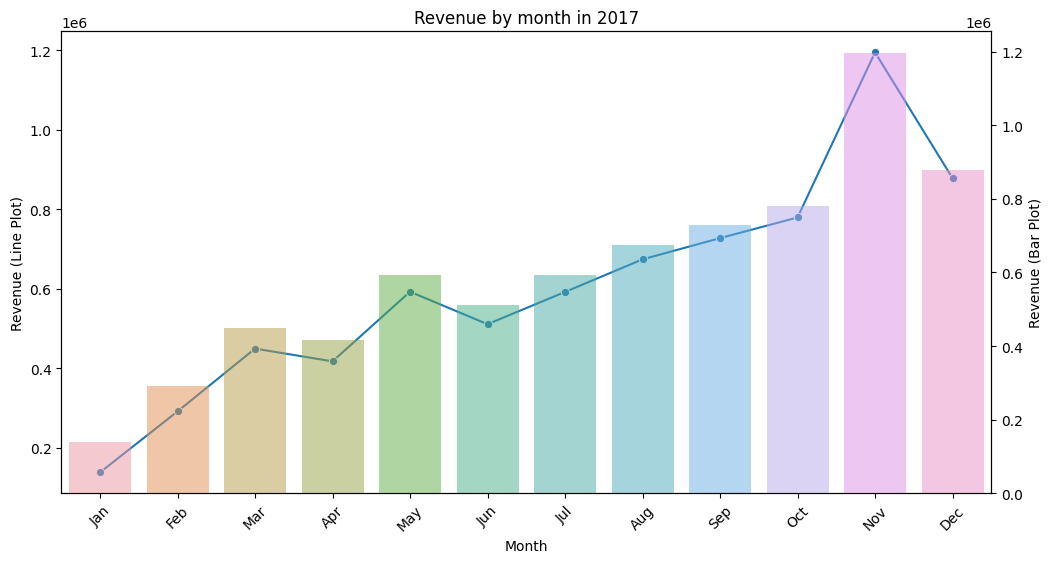

In [16]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [17]:
plot_top_10_revenue_categories(top_10_revenue_categories)

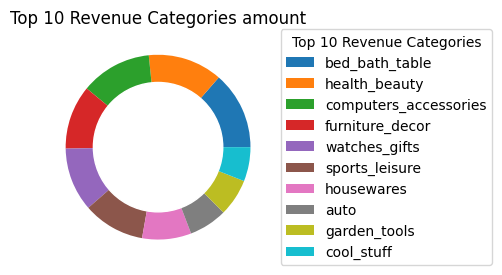

In [18]:
plot_top_10_revenue_categories_amount(top_10_revenue_categories)

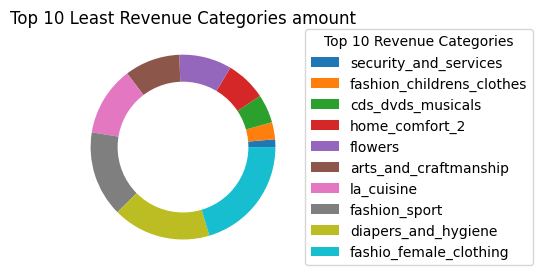

In [19]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [20]:
plot_revenue_per_state(revenue_per_state)

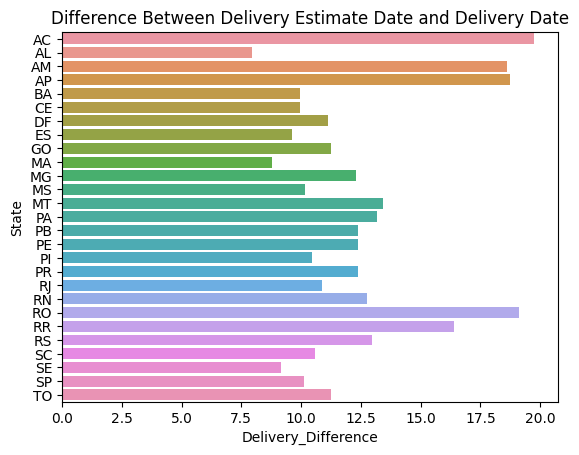

In [21]:
plot_delivery_date_difference(delivery_date_difference)

c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\env_p1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\env_p1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\env_p1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\cliente145\Documents\00.Anyone\E-commerce-Data-Pipeline-main\env_p1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futur

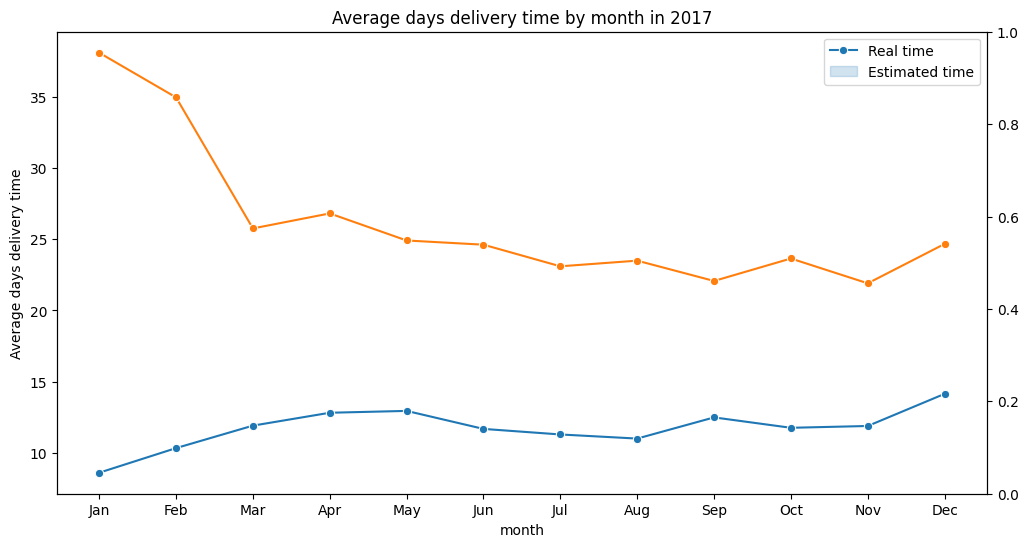

In [22]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

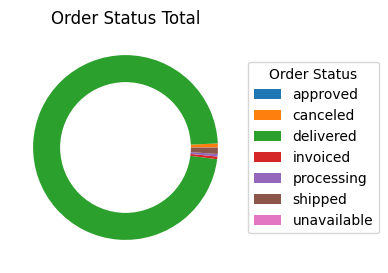

In [23]:
plot_global_ammount_order_status(global_ammount_order_status)

In [24]:
holidays = list(orders_per_day_and_holidays["date"][orders_per_day_and_holidays["holiday"] == True])

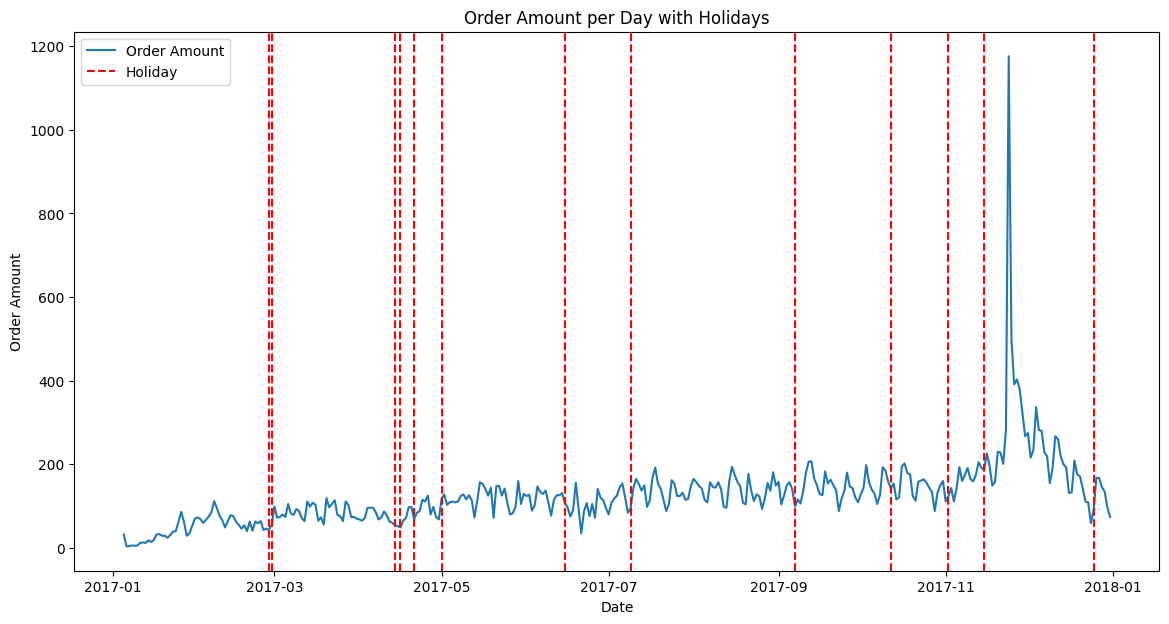

In [25]:
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays,holidays)

The Orders per Day and Holidays plot you will code in src/plots.py has to be similar to this:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 Do you see any relationship between the Brazilian public holidays of 2017 and that year's purchases?

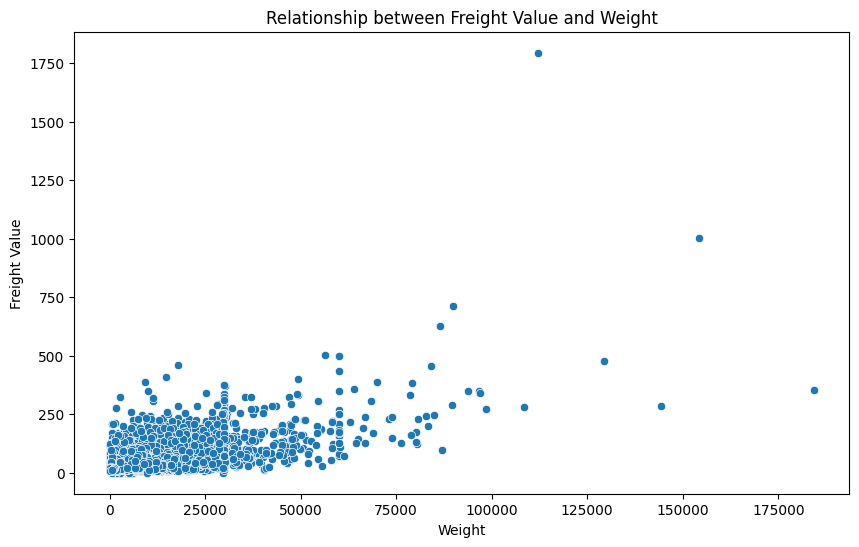

In [26]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

The Freight Value and Weight Relationship plot you will code in src/plots.py has to be similar to this:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 Do you see any correlation between the freight value and the product weight?

In [28]:
print("Correlation between Freight Value and Product Weight is 0.6, then there is positive correlation, while one up, the another also up.")

Correlation between Freight Value and Product Weight is 0.6, then there is positive correlation, while one up, the another also up.
